# Feature extraction using dwt

## Import library

In [1]:
# For change directory
from os import chdir

# For mathematical operation
import numpy as np
import pandas as pd
import scipy,sklearn
# For plot
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
# For DWT
import pywt
from scipy.signal import welch
from scipy.integrate import simps

## Change directory

In [4]:
# Directory
audio_file_path = "/media/mydata/courses/PROJET/Pratical_part/data2"

# Change directory
chdir(audio_file_path)
sr=22050

## Import of data

In [5]:
df=pd.read_csv('final_data.csv')
# Give the name for each column
data=df.T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,263158,263159,263160,263161,263162,263163,263164,263165,263166,263167
0,-0.015948,-0.021025,-0.024122,-0.023574,-0.018674,-0.010003,0.000656,0.010829,0.018100,0.020864,...,-0.176980,-0.182515,-0.128457,-0.041981,0.046224,0.107028,0.111363,0.042921,-0.077803,-0.189423
1,-0.003060,-0.003395,-0.003619,-0.003764,-0.003857,-0.003920,-0.003969,-0.004009,-0.004032,-0.004023,...,-0.074115,-0.045864,-0.030337,-0.040960,-0.073816,-0.110153,-0.128534,-0.118635,-0.087783,-0.056163
2,-0.007804,-0.005254,-0.001886,0.001970,0.005888,0.009421,0.012171,0.013851,0.014322,0.013595,...,-0.004630,0.001610,0.009754,0.003367,0.002244,0.008993,0.011612,0.015421,0.021193,0.023067
3,0.000343,0.000216,0.000038,-0.000150,-0.000300,-0.000377,-0.000361,-0.000257,-0.000090,0.000100,...,0.030260,0.029200,0.028005,0.026717,0.025379,0.024033,0.022719,0.021472,0.020322,0.019291
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.045381,-0.045842,-0.046278,-0.046686,-0.047066,-0.047418,-0.047740,-0.048032,-0.048294,-0.048524


In [6]:
lst2=['Celine','Celine','Celine','Celine','Celine','Celine','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Adele','Celine','Adele','Adele','Celine','Celine','Celine','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele',
 'Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou',
 'Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila',
 'Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila']
data['output']= lst2
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,263159,263160,263161,263162,263163,263164,263165,263166,263167,output
180,-0.012179,-1.243434e-02,-1.388531e-02,-1.653692e-02,-1.384833e-02,-1.140722e-02,-1.131781e-02,-6.738842e-03,-2.025543e-03,-1.157830e-03,...,-0.130476,-0.133927,-0.102706,-0.042583,-0.034124,-0.002861,0.050992,0.035131,0.039881,Singuila
136,0.000000,7.744999e-10,3.096601e-09,6.967778e-09,1.239420e-08,1.938658e-08,2.796001e-08,3.813384e-08,4.993124e-08,6.337909e-08,...,-0.215846,-0.204228,-0.185344,-0.188316,-0.230886,-0.252239,-0.252929,-0.224045,-0.191564,Garou
49,-0.004639,-4.502001e-03,-4.255309e-03,-3.917187e-03,-3.508543e-03,-3.051012e-03,-2.565107e-03,-2.068571e-03,-1.575088e-03,-1.093482e-03,...,0.011781,0.011338,0.010562,0.009554,0.008431,0.007319,0.006335,0.005582,0.005140,Adele
48,-0.011991,-7.122250e-03,2.394754e-03,1.579835e-02,2.221408e-02,2.628396e-02,3.077372e-02,2.798111e-02,2.410156e-02,2.340908e-02,...,-0.198270,-0.169255,-0.143489,-0.099063,-0.017143,0.053758,0.095794,0.147167,0.199258,Adele
109,-0.014905,-1.844847e-02,-2.186662e-02,-2.499194e-02,-2.766068e-02,-2.972144e-02,-3.104293e-02,-3.152099e-02,-3.108438e-02,-2.969902e-02,...,-0.001370,-0.001889,-0.002381,-0.002836,-0.003243,-0.003594,-0.003880,-0.004095,-0.004233,Celine


In [7]:
data['lab']=data.output.map({"Celine":0,"Adele":1,"Garou":2,"Singuila":3})
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,263160,263161,263162,263163,263164,263165,263166,263167,output,lab
42,0.000000,4.811979e-08,1.893441e-07,4.147183e-07,7.098418e-07,1.055265e-06,1.427019e-06,1.797262e-06,2.135042e-06,2.407145e-06,...,-0.038499,-0.036669,-0.035014,-0.033551,-0.032297,-0.031264,-0.030464,-0.029905,Adele,1
108,0.000000,-4.140311e-05,-8.281095e-05,-1.240821e-04,-1.650755e-04,-2.056504e-04,-2.456672e-04,-2.849877e-04,-3.234760e-04,-3.609986e-04,...,-0.005017,-0.005020,-0.005029,-0.005043,-0.005061,-0.005084,-0.005109,-0.005138,Celine,0
55,-0.008121,-6.710428e-03,-4.509946e-03,-2.042321e-03,4.663818e-05,1.768122e-03,3.683304e-03,6.067419e-03,8.457846e-03,1.019036e-02,...,-0.064340,-0.124374,-0.117636,-0.056488,0.017840,0.060454,0.050672,0.006506,Adele,1
164,-0.001363,3.145857e-03,6.612232e-03,1.875088e-03,1.209059e-02,1.151476e-02,9.469224e-03,5.278938e-03,9.574847e-03,2.020890e-02,...,-0.014225,-0.006422,-0.010365,-0.024250,-0.022784,0.002772,0.025344,0.011704,Singuila,3
114,0.000000,6.896938e-09,8.285094e-09,-4.174371e-08,-1.845495e-07,-4.192867e-07,-6.764269e-07,-8.199768e-07,-6.882908e-07,-1.684201e-07,...,0.053146,0.112095,0.118553,0.088129,0.015818,-0.074784,-0.137402,-0.179080,Garou,2


In [8]:
collist = data.columns.tolist()
cols_input = collist[0:263168]
data = data[cols_input + ["lab"]]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,263159,263160,263161,263162,263163,263164,263165,263166,263167,lab
0,-0.015948,-0.021025,-0.024122,-0.023574,-0.018674,-0.010003,0.000656,0.010829,0.018100,0.020864,...,-0.182515,-0.128457,-0.041981,0.046224,0.107028,0.111363,0.042921,-0.077803,-0.189423,0
1,-0.003060,-0.003395,-0.003619,-0.003764,-0.003857,-0.003920,-0.003969,-0.004009,-0.004032,-0.004023,...,-0.045864,-0.030337,-0.040960,-0.073816,-0.110153,-0.128534,-0.118635,-0.087783,-0.056163,0
2,-0.007804,-0.005254,-0.001886,0.001970,0.005888,0.009421,0.012171,0.013851,0.014322,0.013595,...,0.001610,0.009754,0.003367,0.002244,0.008993,0.011612,0.015421,0.021193,0.023067,0
3,0.000343,0.000216,0.000038,-0.000150,-0.000300,-0.000377,-0.000361,-0.000257,-0.000090,0.000100,...,0.029200,0.028005,0.026717,0.025379,0.024033,0.022719,0.021472,0.020322,0.019291,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.045842,-0.046278,-0.046686,-0.047066,-0.047418,-0.047740,-0.048032,-0.048294,-0.048524,0


## Apply DWT for features extraction

### Creation of Helper Functions

In [9]:
def lowpassfilter(signal, wavelet="db4"):
    """this function takes as input the signal, the treshold (hard tresholding methode)
    and the wavelet family, remove the noise and return the
    new signal"""
    #definition of the treshold
    #thresh = thresh*np.nanmax(signal)
    thresh = 0.01*np.sqrt(2*np.log(signal.size))
    # Multilevel 1D Discrete Wavelet Transform of data.
    coeff = pywt.wavedec(signal, wavelet, mode="per")
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="hard" ) for i in coeff[1:])
    #reconstruction of the signal
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

def Mean(x):
    """This function compute the
    mean of an Array x"""
    M = np.mean(x)
    return M

def Std(x):
    """This function compute the
    mean of an Array x"""
    STD = np.std(x)
    return STD

def Energy_factor(x):
    """This function compute the
    Energy factor of an Array x"""
    E=(np.mean(x**2))*len(x)
    return E

def Spectral_Entropy(x):
    """This function compute the
    spectral entropy of an Array x"""
    SE=spectral_entropy(x, sf=100, method='welch')
    return SE

def Median(x):
    """This function compute the
    median of an Array x"""
    return  np.percentile(x, 50)

def spectral_entropy(x, sf, method='fft', nperseg=None, normalize=False):
    """Spectral Entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times)
    sf : float
        Sampling frequency, in Hz.
    method : str
        Spectral estimation method:

        * ``'fft'`` : Fourier Transform (:py:func:`scipy.signal.periodogram`)
        * ``'welch'`` : Welch periodogram (:py:func:`scipy.signal.welch`)
    nperseg : int or None
        Length of each FFT segment for Welch method.
        If None (default), uses scipy default of 256 samples.
    normalize : bool
        If True, divide by log2(psd.size) to normalize the spectral entropy
        between 0 and 1. Otherwise, return the spectral entropy in bit.

    Returns
    -------
    se : float
        Spectral Entropy
    """
    from scipy.signal import periodogram, welch
    x = np.array(x)
    # Compute and normalize power spectrum
    if method == 'fft':
        _, psd = periodogram(x, sf)
    elif method == 'welch':
        _, psd = welch(x, sf, nperseg=nperseg)
    psd_norm = np.divide(psd, psd.sum())
    se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
    if normalize:
        se /= np.log2(psd_norm.size)
    return se


###  Wavelet Threshold De-Noising

Generally, physiological signals are contaminated. Removing noise (denoising) is then an important step.

the wavelet threshold method can perform well in denoising nonstationary vocal signals

\begin{eqnarray}
\lambda=k.\sigma_n\sqrt{(2\log N)}
\end{eqnarray}

where λ is the wavelet threshold, σ is the standard deviation of the noise and N is the length of the
sample signals, respectively.

#### Below we plot in the same graph the original and the reconstructed signal after denoising for one patient

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


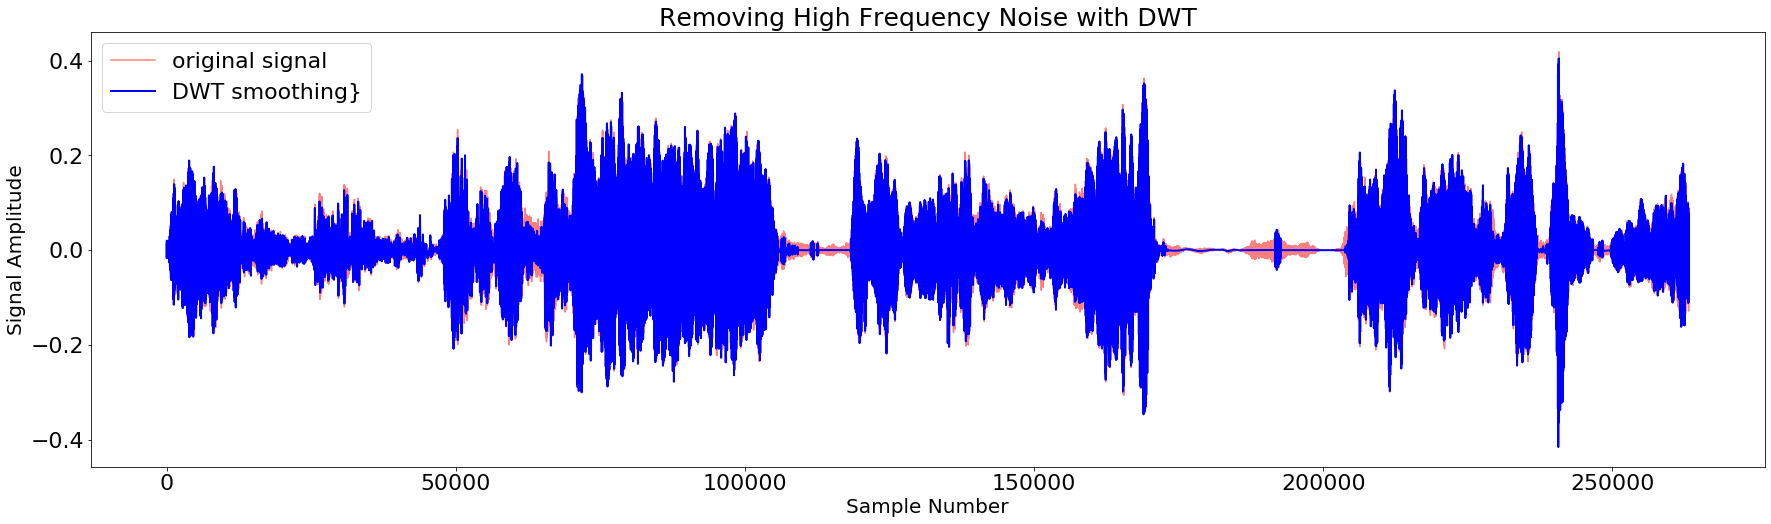

In [10]:
#original signal
signal =  data.loc['1',cols_input ]
plt.figure(figsize=(30,8))
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=28)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.plot(signal, color="r", alpha=0.5, label='original signal')
#reconstructed signal after denoising
rec = lowpassfilter(signal, wavelet="db4")
plt.plot(rec,color="b",label='DWT smoothing}', linewidth=2)
plt.legend()
plt.title('Removing High Frequency Noise with DWT', fontsize=25)
plt.ylabel('Signal Amplitude', fontsize=20)
plt.xlabel('Sample Number', fontsize=20)
plt.show()

###  Signal Decomposition
The DWT is used to split a signal into different frequency sub-bands, as many as needed or as many as possible.

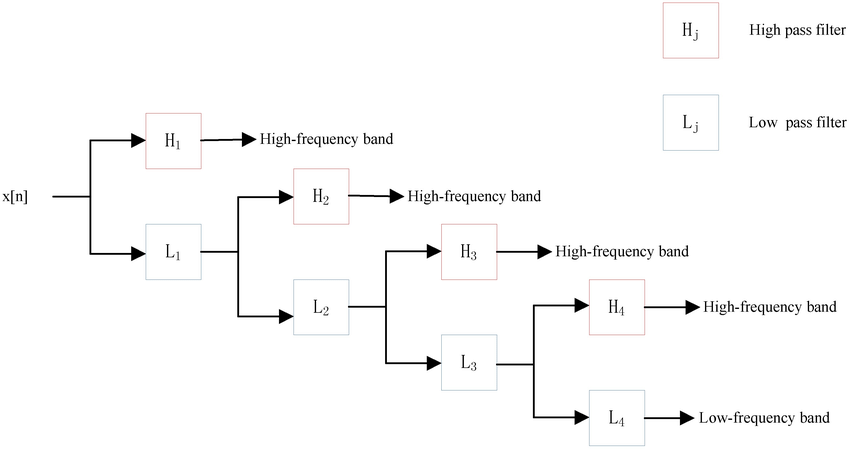

In [25]:
from IPython.display import Image
Image('/home/victoiredjimna/Downloads/DWTlevel4.png',width=800)

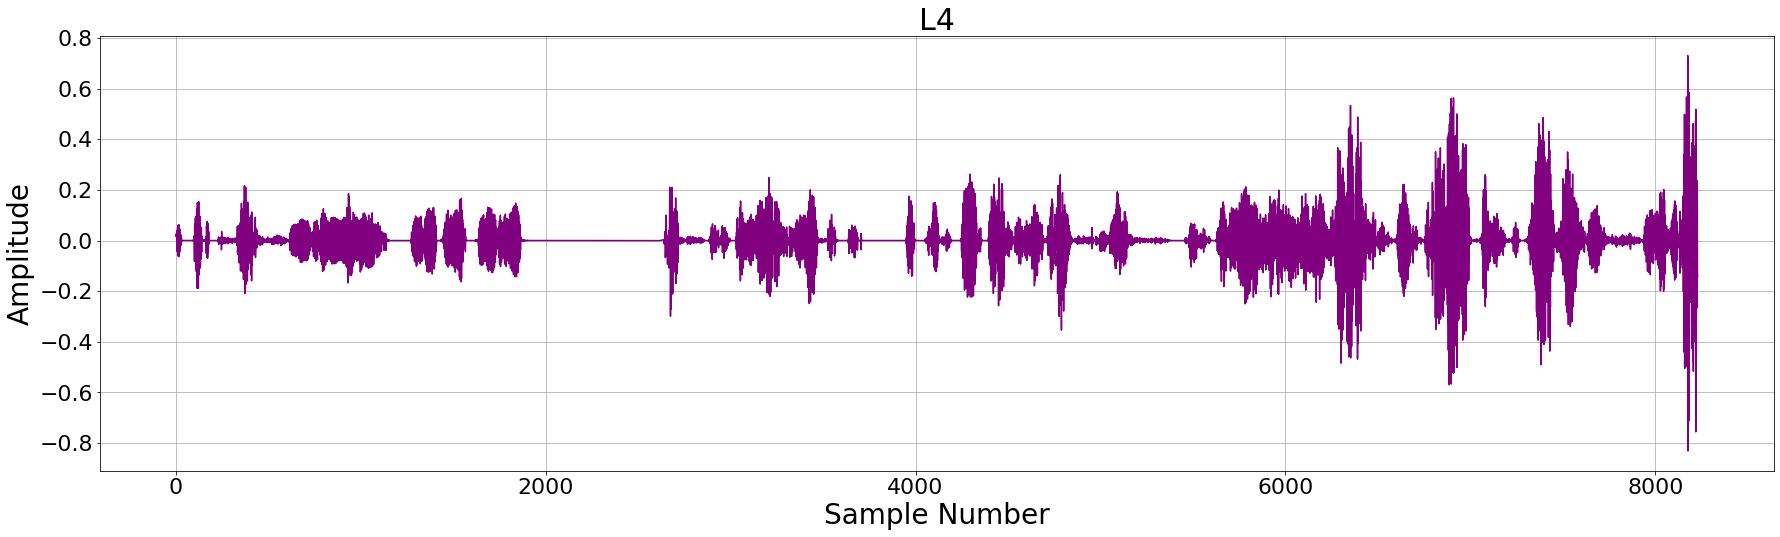

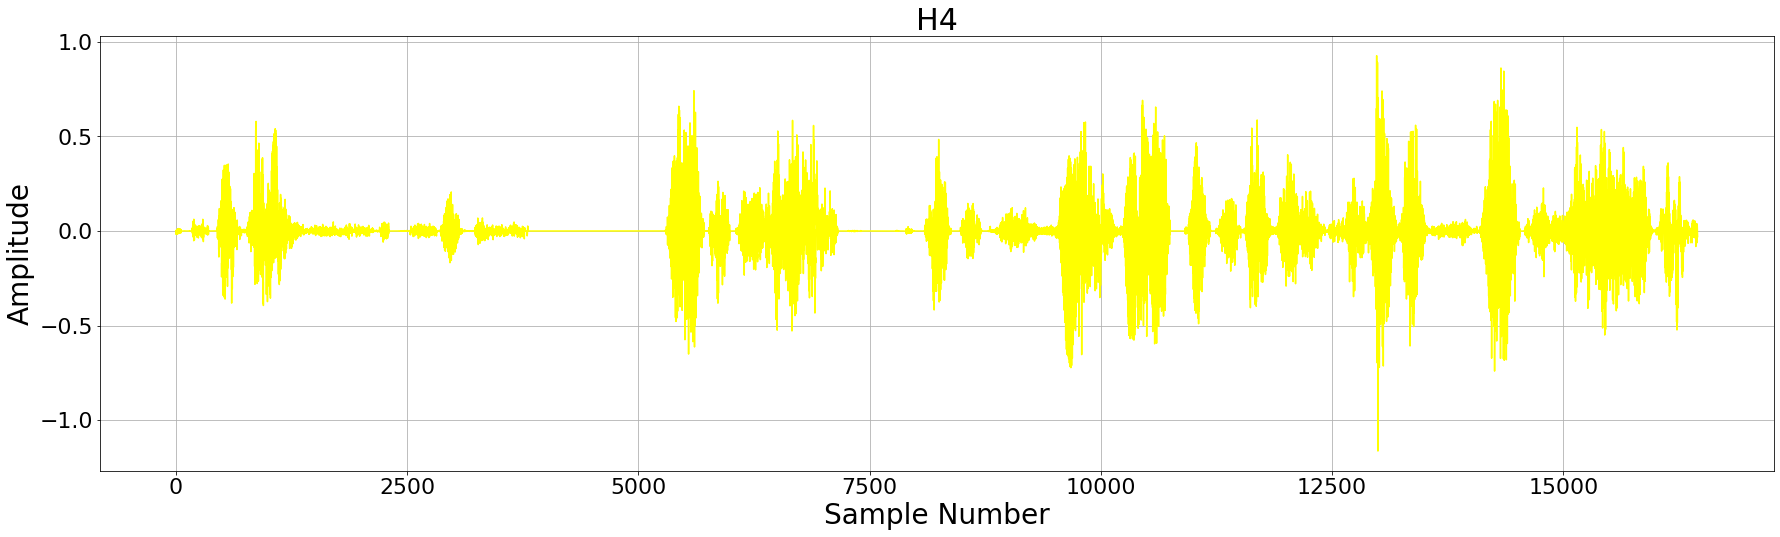

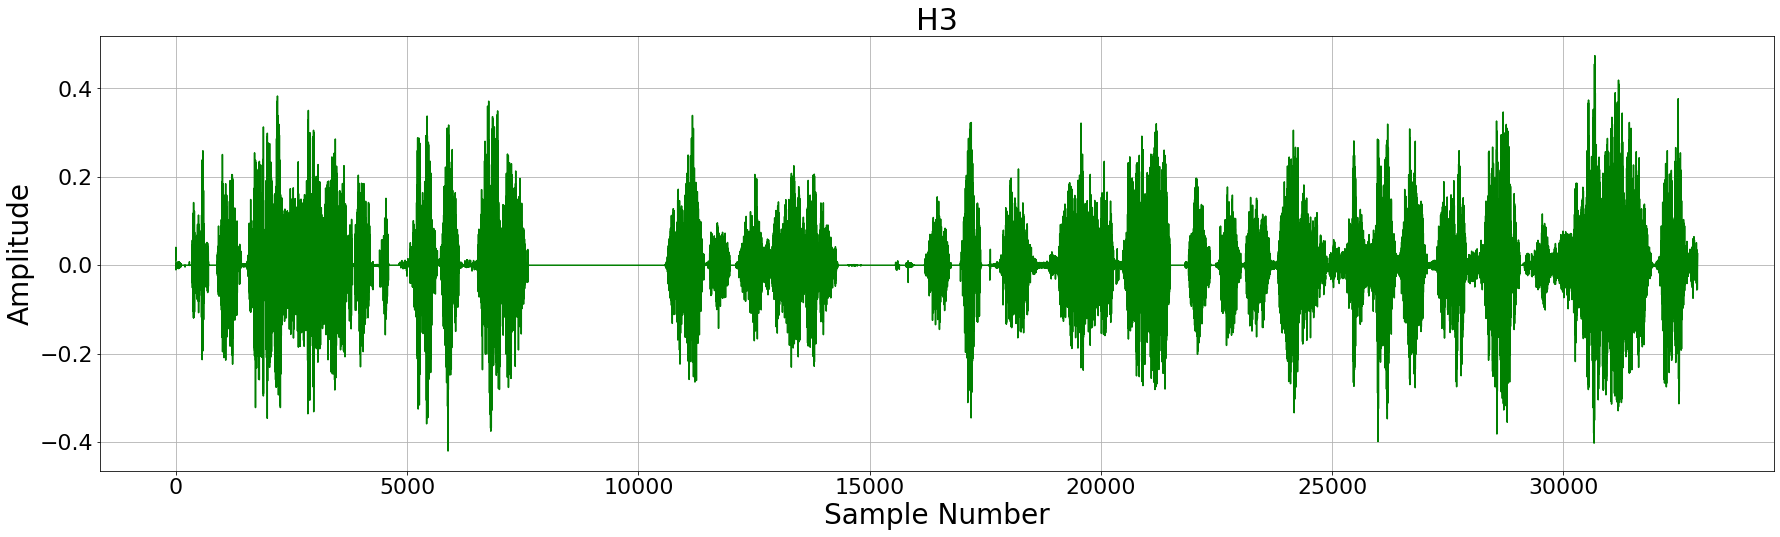

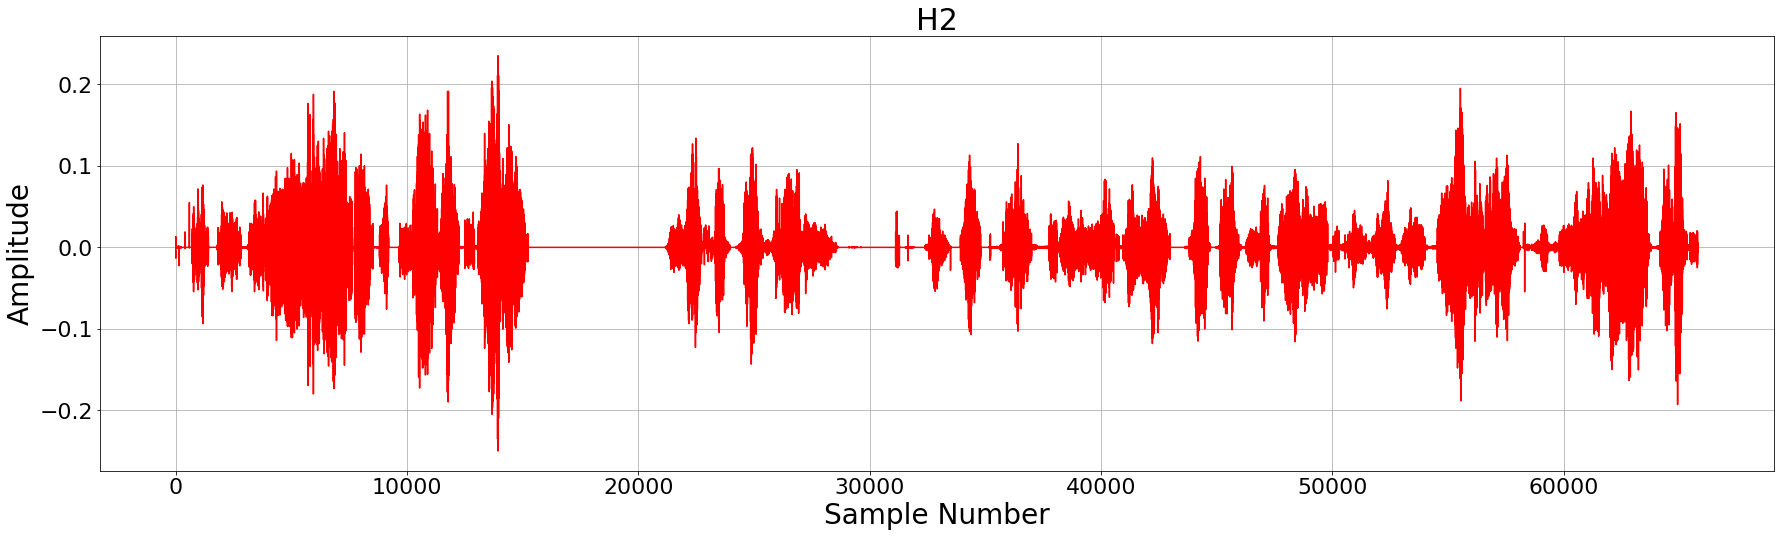

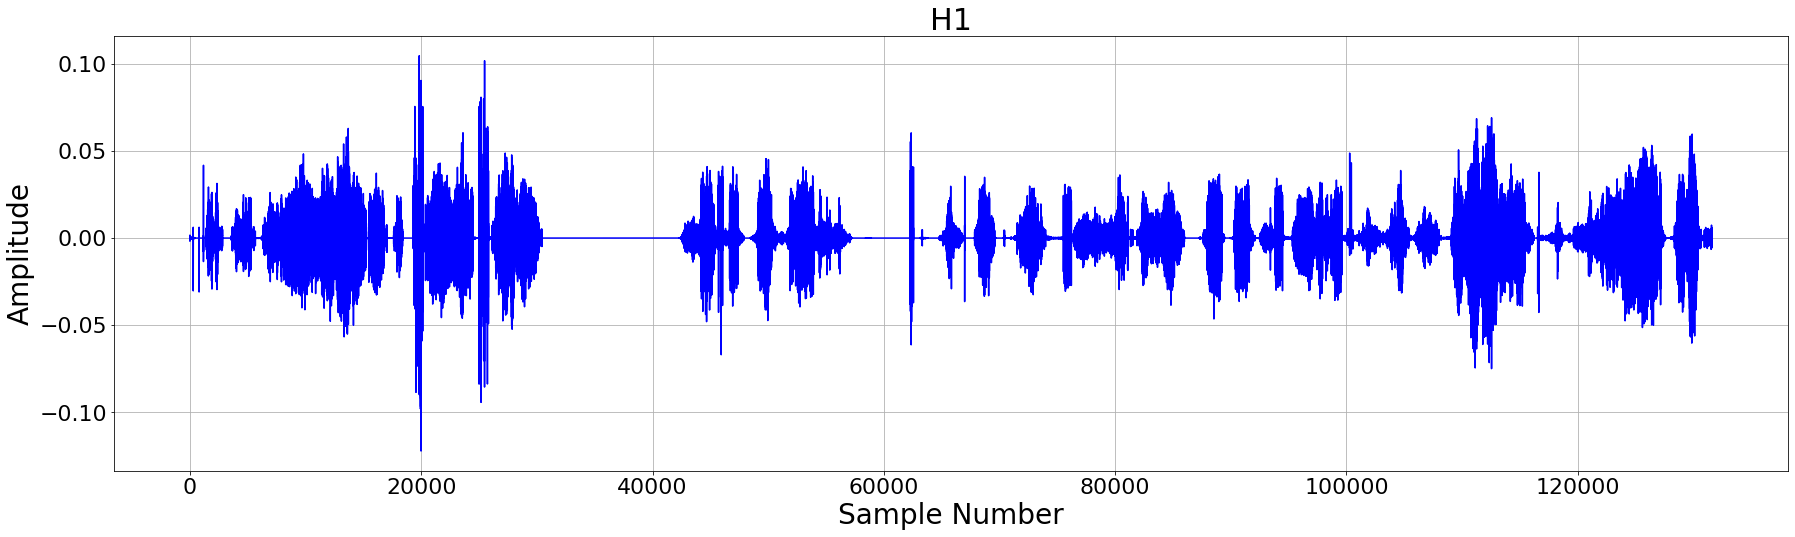

In [23]:
# empty list to save all the coefficients
list_values=list()
# signal after denoising
rec1=rec
for i in range(5):
    # Single level Discrete Wavelet Transform.
    (rec1, coeff_d) = pywt.dwt(rec1, 'db4')
    if i==4:
        list_values.append(rec1)
    else:
        list_values.append(coeff_d)
        
# list containing the names of save coeffs at each level.        
list_f=["H1","H2","H3","H4","L4"]
cols =  ['purple' , 'yellow' , 'green' , 'red' , 'blue']

#plot of differents coefficients that we are going to use
for i in range(5):
    plt.figure(i+1,figsize=(30,8))
    plt.rc('font', size=22)          # controls default text sizes
    plt.rc('axes', titlesize=30)     # fontsize of the axes title
    plt.rc('axes', labelsize=28)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
    plt.plot(list_values[4-i],cols[i])
    plt.title (list_f[4-i] )
    plt.xlabel ('Sample Number')
    plt.ylabel('Amplitude')
    plt.grid(axis="both")


### Helper Functions for Features Extraction
We generate features from each of the sub-band and use the collection of features as an input for a classifier.

#### Feature extraction in Time-Frequency Domain
Very common time-frequency domain DWT based statistical features for classification include:
* mean average value
* spectral entropy

In [12]:
def features_TF(x,sf,band):
    """This function compute the desire 
    features in Time-Frequency Domain"""
    MEA = Mean(x)
    SE  = Spectral_Entropy(x)
    return MEA,SE

#### 5.2 Feature extraction in Frequency Domain

The relative power spectral density estimated by the coefficients of the FFT is extracted

In [13]:
def features_F(x):
    from scipy import signal
    def Power_spectral_density(x):
        """This function compute the
        Power_spectral_density of an Array x"""
        f, Pxx_den = signal.welch(x, sr, nperseg=134)
        return Mean(Pxx_den)
    return Power_spectral_density(x)

#### 5.3 Feature extraction in Time Domain

In the time domain, statistic features are extracted including:
* mean
* median
* standard deviation

In [14]:
def features_T_1(x):
    """This function compute the mean, median,
    standard deviation and the total variation 
    In the time domain """
    Me= Median(x)
    mean = Mean(x)
    STD  = Std(x)
    return Me, mean,STD

### Perform features extraction in the entire dataset

In [15]:
# Names of differents bandes
list_f=["H1","H2","H3","H4","A4"]

# empty list to save the features
s=list()


for k in range(200):
    feats_names=list()
    # original signal
    signal =  data.loc[str(k) , cols_input ]
    # denoising the signal
    rec = lowpassfilter(signal,"db4")
    rec1=rec
    list_values=list()
    for i in range(5):
    # Decomposition of the signal.
        (rec1, coeff_d) = pywt.dwt(rec1, 'db4')
        if i==4:
            list_values.append(rec1)
        else:
            list_values.append(coeff_d)
            
    # Features extraction in time-frequency domain
    feats_1=np.zeros(10)
    band=[2080,4160]
    for k in range(5):
        a=features_TF(list_values[k],sr,band)
        feats_1[2*k]=a[0]
        feats_1[2*k+1]=a[1]
        feats_names+=["Mean_"+list_f[k], "Sp_Entropy_"+list_f[k]]
        if k==4:
            band=[0,260]
        else:
            band=[band[0]/2,band[1]/2]
        
    # Features extraction in frequency domain
    feats_2=np.zeros(5)
    for k in range(5):
        feats_2[k]=features_F(list_values[k])
        feats_names+=["Psd_"+list_f[k]]
        
    # Features extraction in time domain
    b1,b2,b3=features_T_1(rec1)
    a= b1,b2,b3
    feats_names+=["Median_init_s", "Mean_init_s","Std_init_s"]
    feats_3 = a  
    
    # list of all the features
    feats= list(feats_1)+ list(feats_2) + list(feats_3)
    s.append(feats)

### Create a new dataset containing all the extracted features

In [16]:
df = pd.DataFrame() 
for k in range(len(s)):
    df[k]=s[k]
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-2.767635e-06,9.903641e-07,-3.991461e-06,6.122799e-07,6.602558e-07,-6.067964e-06,1.474018e-05,-1.787186e-06,-4.573194e-07,1.529190e-06,...,-2.300533e-07,-7.520463e-06,-2.252792e-05,-1.324033e-06,8.632920e-06,-1.044509e-06,1.260743e-05,-1.410851e-05,2.522227e-06,-4.336158e-06
1,6.086917e+00,5.924357e+00,5.884581e+00,5.407758e+00,6.208037e+00,6.133379e+00,6.221510e+00,6.172146e+00,6.280640e+00,6.144654e+00,...,6.724715e+00,6.626101e+00,6.562736e+00,6.252848e+00,6.254143e+00,6.310970e+00,6.068405e+00,6.329816e+00,6.247359e+00,6.399174e+00
2,-8.122350e-06,-2.666666e-06,8.081545e-05,-5.134893e-06,1.000902e-05,-8.315733e-05,-5.796684e-08,6.756807e-06,8.501421e-06,3.778517e-06,...,-1.177706e-05,5.172317e-05,6.914596e-06,5.566402e-07,-2.226615e-05,2.993772e-06,9.602555e-06,3.119939e-06,1.826751e-05,6.480901e-07
3,5.789609e+00,5.927631e+00,5.915787e+00,5.621631e+00,6.058609e+00,6.409788e+00,5.565660e+00,5.847861e+00,5.747392e+00,5.738888e+00,...,5.761988e+00,5.711180e+00,5.752926e+00,5.937148e+00,5.899990e+00,5.928382e+00,5.933801e+00,5.849401e+00,6.021408e+00,5.851583e+00
4,4.366084e-05,-4.848531e-06,-4.531411e-05,-2.460154e-05,-5.468305e-06,1.835153e-06,6.279837e-05,9.230475e-05,5.908588e-06,-4.183472e-06,...,-1.212352e-04,1.203722e-04,3.395061e-04,3.226720e-05,4.425375e-04,1.081181e-04,-1.899790e-04,-1.586252e-04,2.184236e-05,1.054631e-04
5,5.485938e+00,5.648147e+00,6.315819e+00,6.115254e+00,5.396710e+00,6.478890e+00,6.411508e+00,6.431968e+00,6.338798e+00,6.092020e+00,...,6.473109e+00,6.759736e+00,6.845603e+00,6.313003e+00,6.067057e+00,5.763827e+00,6.204364e+00,6.389041e+00,6.387305e+00,6.449175e+00
6,-1.104348e-04,-4.494554e-04,-1.084176e-04,9.147148e-08,-4.133421e-04,-8.417013e-05,9.556465e-04,-3.469012e-04,4.181439e-03,-9.080953e-04,...,-9.824564e-04,-3.921376e-04,8.533634e-04,3.829925e-03,1.623499e-04,1.011650e-03,1.479664e-04,-1.683446e-03,-5.628609e-04,-2.710541e-03
7,5.562813e+00,6.258332e+00,6.312084e+00,5.765347e+00,6.451705e+00,5.552863e+00,6.413788e+00,6.447715e+00,6.014638e+00,6.221575e+00,...,6.663822e+00,6.702556e+00,6.728769e+00,6.809009e+00,6.572645e+00,6.390020e+00,6.717163e+00,6.593080e+00,6.749530e+00,6.539983e+00
8,1.221407e-04,-3.419754e-04,-4.067170e-04,3.107981e-05,-4.551600e-05,6.165286e-05,-1.750056e-03,-7.951709e-04,-1.102922e-03,-6.025333e-04,...,3.749762e-04,4.297945e-04,-1.863321e-04,6.074033e-04,6.936306e-04,8.930250e-04,2.962594e-03,7.500756e-04,-5.746579e-04,-2.188353e-07
9,6.643554e+00,6.044137e+00,6.459942e+00,6.153816e+00,6.371458e+00,6.000529e+00,6.458417e+00,6.547511e+00,6.469522e+00,6.244961e+00,...,6.321092e+00,6.291472e+00,5.818924e+00,6.401454e+00,6.396913e+00,6.277928e+00,6.347437e+00,5.809495e+00,5.618644e+00,5.800311e+00


In [17]:
# Transpose to make Each raw correspond to one patient 
df1=df.T
# Define the names of all the columns
df1.columns= feats_names
#define a column for different class
df1['label']= list(data['lab'])
df1

,Mean_H1,Sp_Entropy_H1,Mean_H2,Sp_Entropy_H2,Mean_H3,Sp_Entropy_H3,Mean_H4,Sp_Entropy_H4,Mean_A4,Sp_Entropy_A4,Psd_H1,Psd_H2,Psd_H3,Psd_H4,Psd_A4,Median_init_s,Mean_init_s,Std_init_s,label
0,-2.767635e-06,6.086917,-8.122350e-06,5.789609,0.000044,5.485938,-1.104348e-04,5.562813,1.221407e-04,6.643554,1.203379e-08,9.520795e-08,1.704677e-06,8.623802e-06,5.713514e-07,-8.614585e-05,1.221407e-04,0.080451,0
1,9.903641e-07,5.924357,-2.666666e-06,5.927631,-0.000005,5.648147,-4.494554e-04,6.258332,-3.419754e-04,6.044137,7.719328e-09,5.059786e-08,4.547577e-07,1.487991e-06,2.205944e-06,-2.942673e-04,-3.419754e-04,0.157682,0
2,-3.991461e-06,5.884581,8.081545e-05,5.915787,-0.000045,6.315819,-1.084176e-04,6.312084,-4.067170e-04,6.459942,6.620830e-09,4.221092e-08,3.335763e-07,1.376970e-06,1.902315e-06,-8.534620e-04,-4.067170e-04,0.145039,0
3,6.122799e-07,5.407758,-5.134893e-06,5.621631,-0.000025,6.115254,9.147148e-08,5.765347,3.107981e-05,6.153816,3.710092e-09,1.945682e-08,1.115178e-07,1.010719e-06,1.397418e-06,-8.679825e-06,3.107981e-05,0.125409,0
4,6.602558e-07,6.208037,1.000902e-05,6.058609,-0.000005,5.396710,-4.133421e-04,6.451705,-4.551600e-05,6.371458,2.959253e-09,1.433651e-08,3.174845e-07,2.133410e-06,1.164007e-06,2.074146e-04,-4.551600e-05,0.113734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.044509e-06,6.310970,2.993772e-06,5.928382,0.000108,5.763827,1.011650e-03,6.390020,8.930250e-04,6.277928,1.460681e-08,9.234377e-08,1.099245e-06,2.658335e-06,4.935227e-06,4.058493e-04,8.930250e-04,0.237594,3
196,1.260743e-05,6.068405,9.602555e-06,5.933801,-0.000190,6.204364,1.479664e-04,6.717163,2.962594e-03,6.347437,1.299430e-08,8.394619e-08,6.180983e-07,1.805873e-06,4.416657e-06,4.895230e-04,2.962594e-03,0.222995,3
197,-1.410851e-05,6.329816,3.119939e-06,5.849401,-0.000159,6.389041,-1.683446e-03,6.593080,7.500756e-04,5.809495,1.174558e-08,7.438473e-08,4.991811e-07,9.459558e-07,5.215095e-06,5.311960e-04,7.500756e-04,0.244388,3
198,2.522227e-06,6.247359,1.826751e-05,6.021408,0.000022,6.387305,-5.628609e-04,6.749530,-5.746579e-04,5.618644,1.318221e-08,7.928017e-08,5.859979e-07,1.318666e-06,5.578285e-06,-1.624610e-04,-5.746579e-04,0.253807,3


In [18]:
df1.to_csv('Voice_data.csv', index=False, encoding="utf-8")